In [ ]:
import sympy as sp
import jax.numpy as np
from jax import vmap
import matplotlib.pyplot as plt

In [1]:
from eq1 import config
from main import run

In [2]:
network, best = run(config)

16:06:13.704 [INFO] Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
16:06:13.706 [INFO] Unable to initialize backend 'gpu': NOT_FOUND: Could not find registered platform with name: "cuda". Available platform names are: Interpreter Host
16:06:13.708 [INFO] Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
16:06:14.299 [INFO] Constructed symbolic model
16:06:24.820 [INFO] Constructed JAXified model
16:06:30.293 [INFO] Epoch: 1, Loss: 15.6940336227417
16:06:30.318 [INFO] Epoch: 2, Loss: 2.7460334300994873
16:06:30.353 [INFO] Epoch: 3, Loss: 1.6170635223388672
16:06:30.383 [INFO] Epoch: 4, Loss: 1.3277583122253418
16:06:30.410 [INFO] Epoch: 5, Loss: 1.0423061847686768
16:06:30.437 [INFO] Epoch: 6, Loss: 0.9838258028030396
16:06:30.463 [INFO] Epoch: 7, Loss: 0.8587218523025513
16:06:30.492 [INFO] Epoch: 8, Loss: 0.7800523042678833
16:06:30.515 [INFO] Epoch: 9, Loss: 0.6205719709396362
16:06:30.537 [INFO

Nothing more to prune!


$\displaystyle 0.360583629221956 k x + 0.553334355354309 e^{1.11770957942343 k x + 0.124669827520847 k} + 0.302304297685623$

In [3]:
network.model_y

a_o2__01__03*a_o4__00__01*k*x + a_o5__02__03*exp(a_o2__00__02*k + a_o2__01__02*a_o4__00__01*k*x) + b

In [4]:
y_prediction_best = best.model_y.subs(zip(best.alphas, best.W))
y_prediction_best

0.360583629221956*k*x + 0.553334355354309*exp(1.11770957942343*k*x + 0.124669827520847*k) + 0.302304297685623

# Plot

In [35]:
k = network.symbols.k
x = network.symbols.x

In [37]:
y_pred_fn = sp.lambdify([k, x], y_prediction_best)
y_real_fn = sp.lambdify([k, x], sp.exp(k*x))

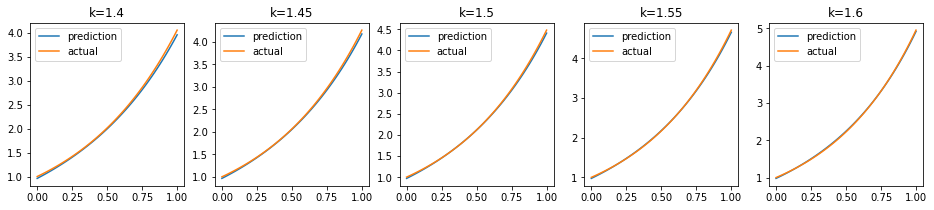

In [44]:
x_try = np.linspace(0, 1, 50)

k_tries = [1.4, 1.45, 1.5, 1.55, 1.6]
fig, axs = plt.subplots(1, len(k_tries))
fig.set_size_inches(len(k_tries)*3.2, 3)

for ax, k_try in zip(axs, k_tries):
  ax.set_title(f'k={k_try}')
  ax.plot(x_try, y_pred_fn(k_try, x_try), label=f'prediction')
  ax.plot(x_try, y_real_fn(k_try, x_try), label=f'actual')
  ax.legend()
plt.show()

# Test

In [ ]:
dydx = sp.diff(y_prediction_best, 'x')
dydx

loss = (dydx - network.symbols.k * y_prediction_best)**2

sp.integrate(loss, ('x', 0, 1), ('k', 1.4, 1.6))

In [ ]:
y = sp.exp(k*x)

dydx = sp.diff(y, x)

loss = (dydx - k * y)**2

sp.integrate(loss, ('x', 0, 1), ('k', 1.4, 1.6))